In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [232]:
df = pd.read_csv("UCL_AllTime_Performance_Table.csv")

In [233]:
print("Colonne non numeriche prima della codifica:")
print(df.select_dtypes(include=['object']).columns)

Colonne non numeriche prima della codifica:
Index(['Team', 'goals'], dtype='object')


In [234]:
label_encoder = LabelEncoder()

In [235]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
print("Colonne dopo la codifica:")
print(df.select_dtypes(include=['object']).columns)


Colonne dopo la codifica:
Index([], dtype='object')


In [237]:
print(df.head())

     #  Team   M.    W   D    L  goals  Dif  Pt.
0  1.0   271  486  291  85  110     17  533  533
1  2.0    48  388  231  78   79    268  427  427
2  3.0   105  341  196  77   68    235  319  319
3  4.0   224  289  153  69   67    209  224  224
4  5.0   185  297  151  68   78    189  171  171


In [239]:
X = df.drop(columns=['goals'])
y = df['goals']

In [240]:
print("Tipo delle colonne di X:")
print(X.dtypes)

Tipo delle colonne di X:
#       float64
Team      int64
M.        int64
W         int64
D         int64
L         int64
Dif       int64
Pt.       int64
dtype: object


In [241]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))  #valore continuo

c:\Users\loren\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [245]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 27893.7109 - val_loss: 30597.0840
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28210.2070 - val_loss: 30586.3652
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26941.8301 - val_loss: 30573.9375
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28093.4453 - val_loss: 30559.0742
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27610.4766 - val_loss: 30541.1836
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27447.3770 - val_loss: 30519.2988
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27851.0684 - val_loss: 30492.4609
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24904.3027 - val_loss: 30460.3418
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26152.7891 - val_loss: 30420.9297
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25978.8203 - val_loss: 30373.7363
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29077.1055 - val_loss: 30316.8301
Epoch 1

In [246]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (MSE): {test_loss}")

Test loss (MSE): 9021.5849609375


In [247]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [248]:
for real, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Valore reale: {real}, Predizione: {pred[0]}")

Valore reale: 205, Predizione: 109.928955078125
Valore reale: 30, Predizione: 109.928955078125
Valore reale: 93, Predizione: 109.928955078125
Valore reale: 70, Predizione: 109.928955078125
Valore reale: 250, Predizione: 109.928955078125


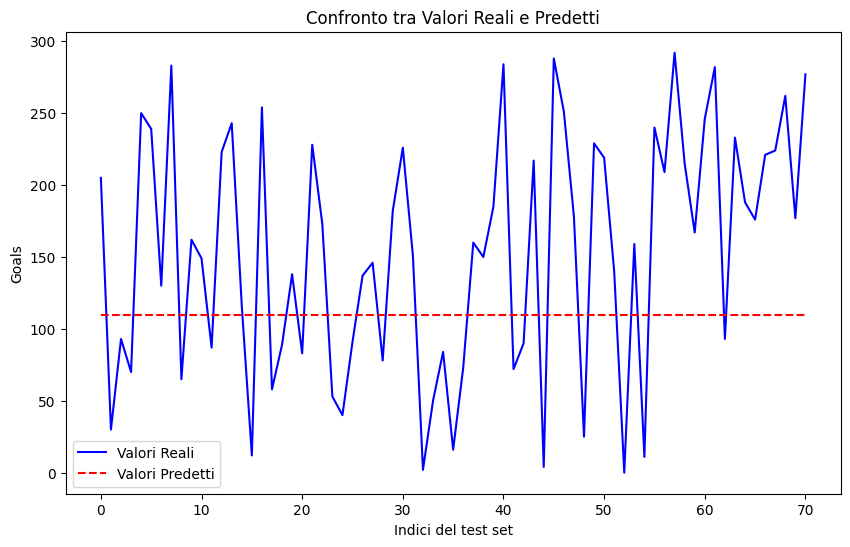

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valori Reali', color='blue')
plt.plot(y_pred, label='Valori Predetti', color='red', linestyle='--')
plt.xlabel('Indici del test set')
plt.ylabel('Goals')
plt.title('Confronto tra Valori Reali e Predetti')
plt.legend()
plt.show()




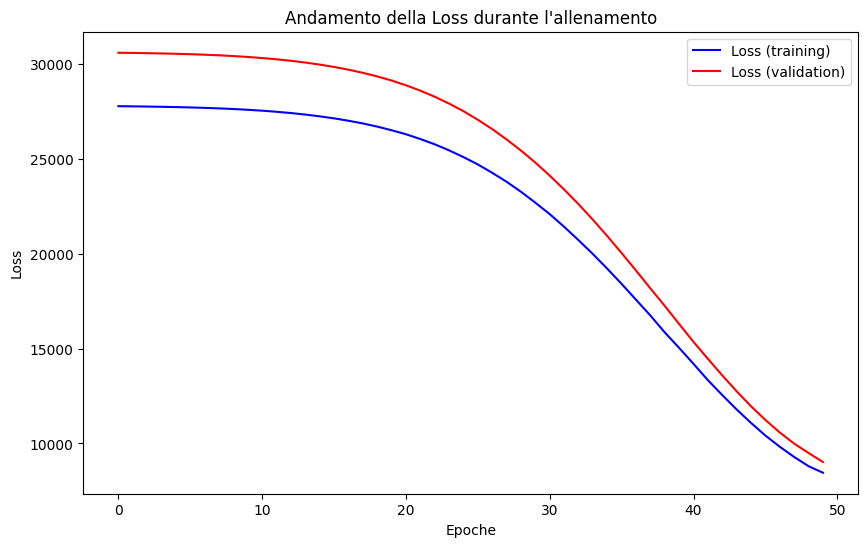

In [250]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss (training)', color='blue')
plt.plot(history.history['val_loss'], label='Loss (validation)', color='red')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Andamento della Loss durante l\'allenamento')
plt.legend()
plt.show()